<a href="https://colab.research.google.com/github/angelaoica-dev/challenge-AluraStoreLatam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Exploración inicial de los datos

###Limpiar datos.

In [17]:
# Corregir problemas de encoding
def limpiar_columnas(df):
    df.rename(columns={
        "CategorÃ­a del Producto": "Categoría del Producto",
        "Costo de envÃ­o": "Costo de envío",
        "CalificaciÃ³n": "Calificación",
        "MÃ©todo de pago": "Método de pago"
    }, inplace=True)

for df in [tienda, tienda2, tienda3, tienda4]:
    limpiar_columnas(df)

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

print("✔ Los datos han sido corrgidos correctamente. ")
print(f"Total de registros: {len(df_tiendas)}")

df_tiendas.head()

✔ Los datos han sido corrgidos correctamente. 
Total de registros: 9435


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [18]:
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


In [20]:
df_tiendas.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



### Ingreso total de cada tienda.


In [21]:
tiendas = [tienda, tienda2, tienda3, tienda4]

for i, df in enumerate(tiendas, start=1):
    ingresos = df['Precio'].sum()
    print(f"Ingreso Total Tienda {i}: ${ingresos:,.2f}")

Ingreso Total Tienda 1: $1,150,880,400.00
Ingreso Total Tienda 2: $1,116,343,500.00
Ingreso Total Tienda 3: $1,098,019,600.00
Ingreso Total Tienda 4: $1,038,375,700.00


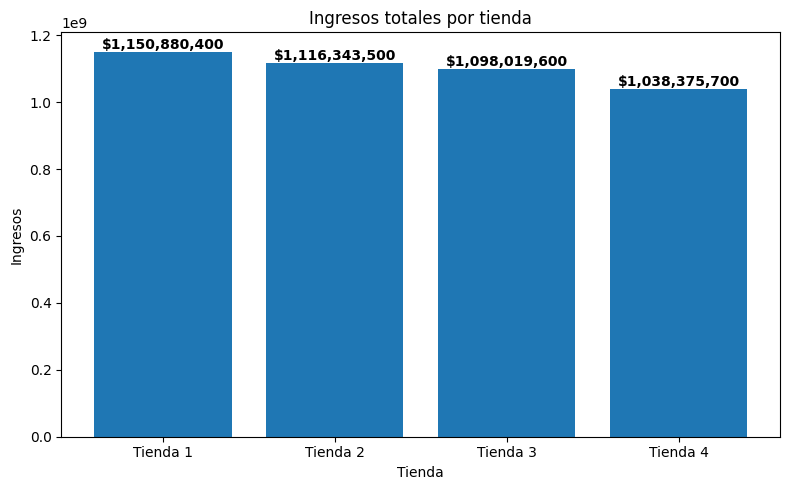

In [37]:
#Comparación directa
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos)

plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")

for i, v in enumerate(ingresos):
    plt.text(i, v, f"${v:,.0f}", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

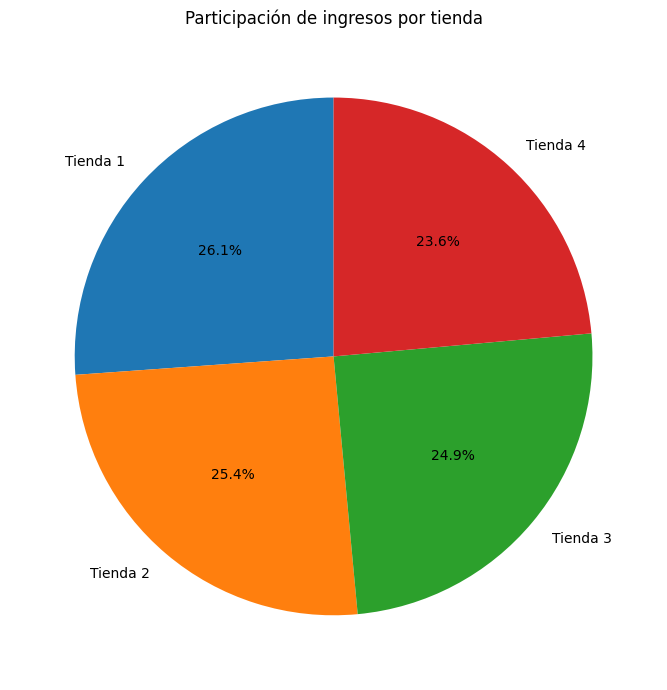

In [39]:
#Participación porcentual
plt.figure(figsize=(7, 7))
plt.pie(
    ingresos,
    labels=nombres_tiendas,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Participación de ingresos por tienda")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [29]:
todas = pd.concat(
    [df.assign(Tienda=nombre) for nombre, df in tiendas.items()],
    ignore_index=True
)

# Ventas por categoría y tienda
ventas_categoria_tienda = (
    todas
    .groupby(["Tienda", "Categoría del Producto"])
    .size()
    .reset_index(name="Cantidad de Ventas")
)

tabla_categoria = (
    ventas_categoria_tienda
    .pivot(
        index="Categoría del Producto",
        columns="Tienda",
        values="Cantidad de Ventas"
    )
    .fillna(0)
)

print(tabla_categoria)

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


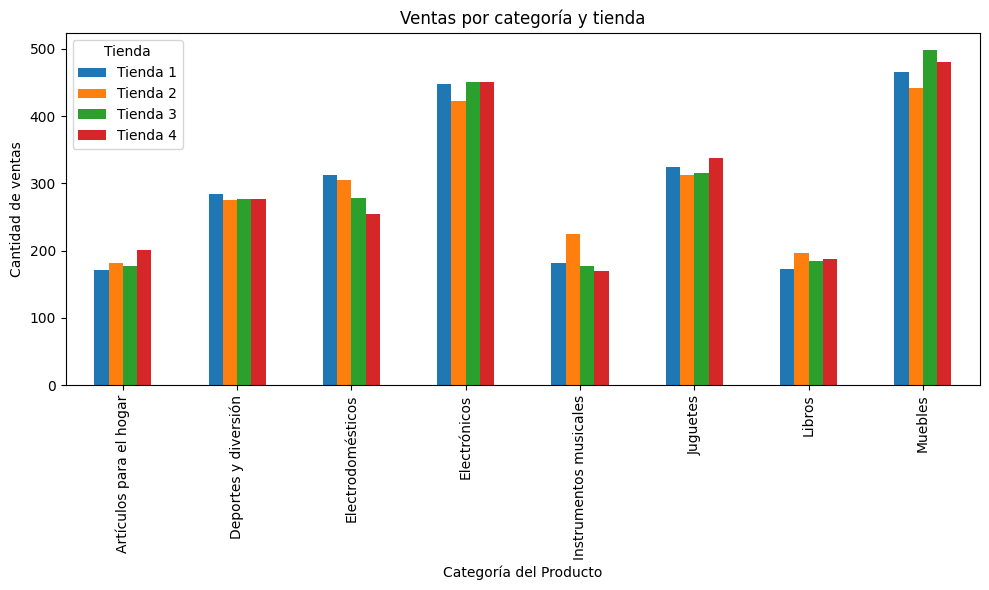

In [40]:
import matplotlib.pyplot as plt

tabla_categoria.plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Ventas por categoría y tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de ventas")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [31]:
todas = pd.concat(
    [df.assign(Tienda=nombre) for nombre, df in tiendas.items()],
    ignore_index=True
)

calificacion_promedio = (
    todas
    .groupby("Tienda")["Calificación"]
    .mean()
    .round(2)
)

print(calificacion_promedio)

Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


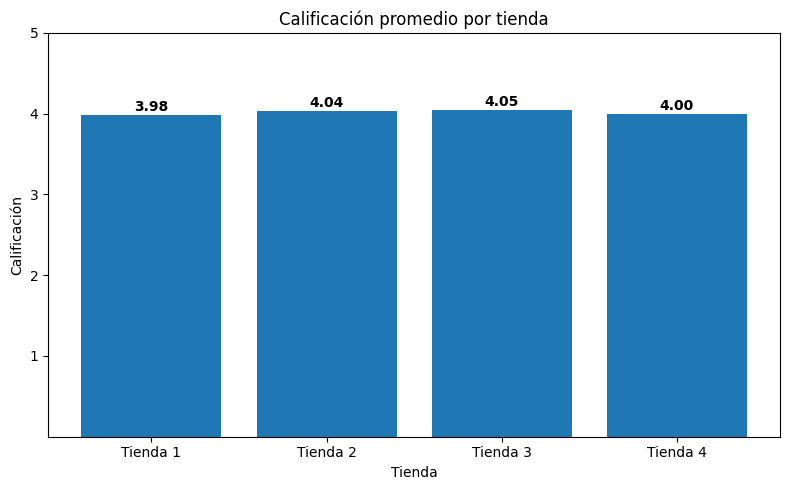

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(
    calificacion_promedio.index,
    calificacion_promedio.values
)

plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación")
plt.yticks([1, 2, 3, 4, 5])

for i, v in enumerate(calificacion_promedio.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [1]:
def analizar_productos(df, top_n=5):
    conteo = df["Producto"].value_counts()

    return {
        "mas_vendidos": conteo.head(top_n),
        "menos_vendidos": conteo.tail(top_n),
        "producto_mas_vendido": conteo.idxmax(),
        "ventas_mas_vendido": conteo.max(),
        "producto_menos_vendido": conteo.idxmin(),
        "ventas_menos_vendido": conteo.min()
    }
resumen_productos = []

for nombre, df in tiendas.items():
    resultado = analizar_productos(df, top_n=3)

    print(f"\n📊 {nombre}")

    print("\nProductos MÁS vendidos:")
    print(resultado["mas_vendidos"])

    print("\nProductos MENOS vendidos:")
    print(resultado["menos_vendidos"])

    resumen_productos.append({
        "Tienda": nombre,
        "Producto más vendido": resultado["producto_mas_vendido"],
        "Ventas producto más vendido": resultado["ventas_mas_vendido"],
        "Producto menos vendido": resultado["producto_menos_vendido"],
        "Ventas producto menos vendido": resultado["ventas_menos_vendido"]
    })
df_resumen_productos = pd.DataFrame(resumen_productos)
df_resumen_productos

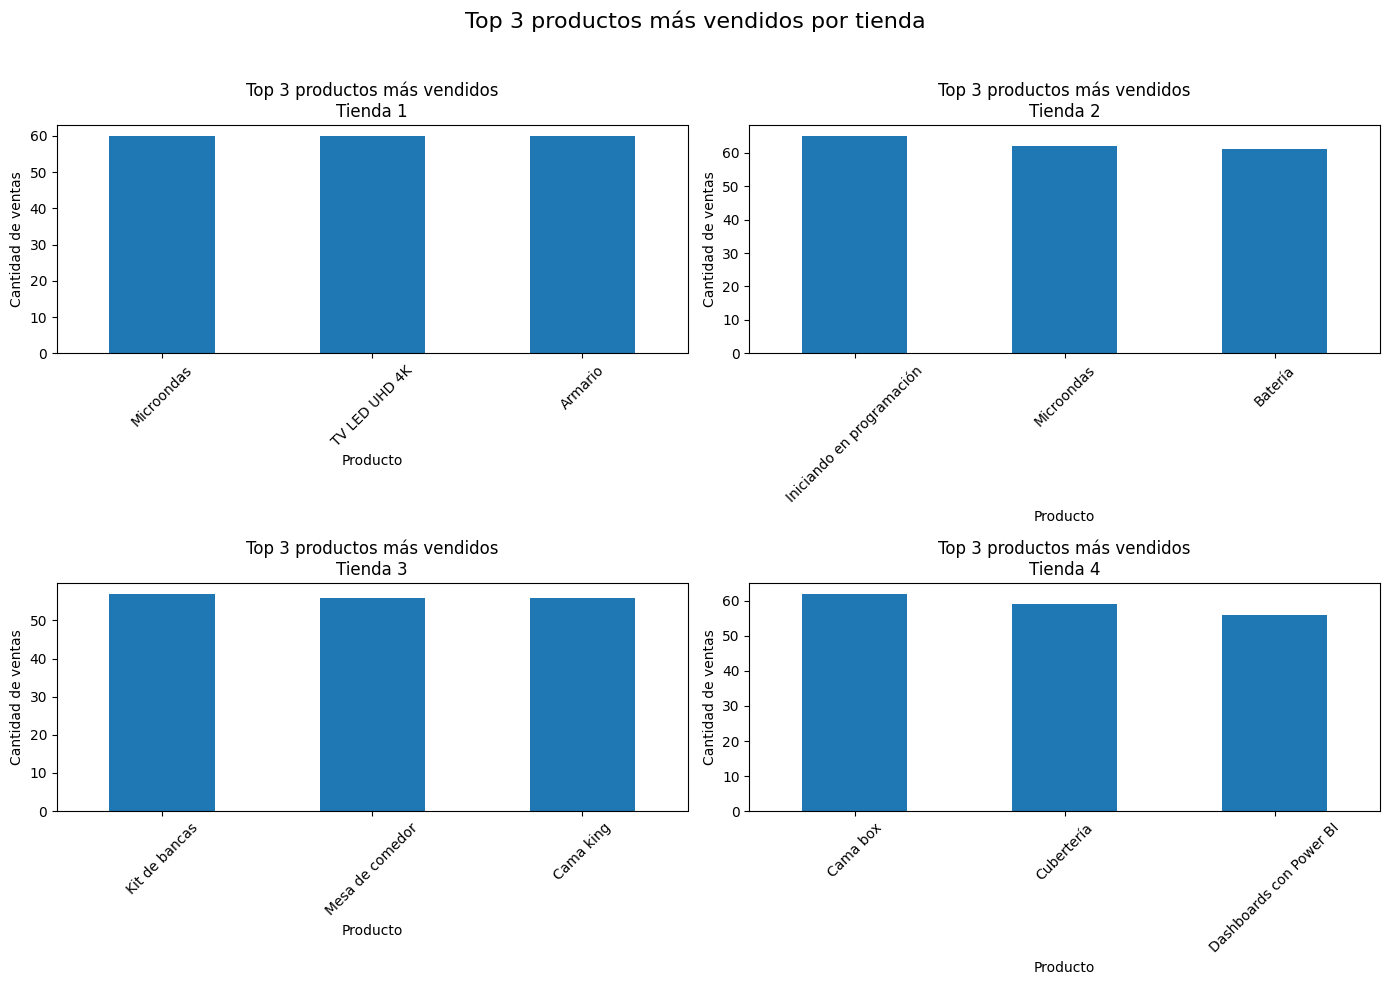

In [46]:
#Productos más vendidos
tiendas_dict = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (nombre, df) in zip(axes, tiendas_dict.items()):
    top_productos = df["Producto"].value_counts().head(3)

    top_productos.plot(kind="bar", ax=ax)
    ax.set_title(f"Top 3 productos más vendidos\n{nombre}")
    ax.set_xlabel("Producto")
    ax.set_ylabel("Cantidad de ventas")
    ax.tick_params(axis="x", rotation=45)

plt.suptitle("Top 3 productos más vendidos por tienda", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

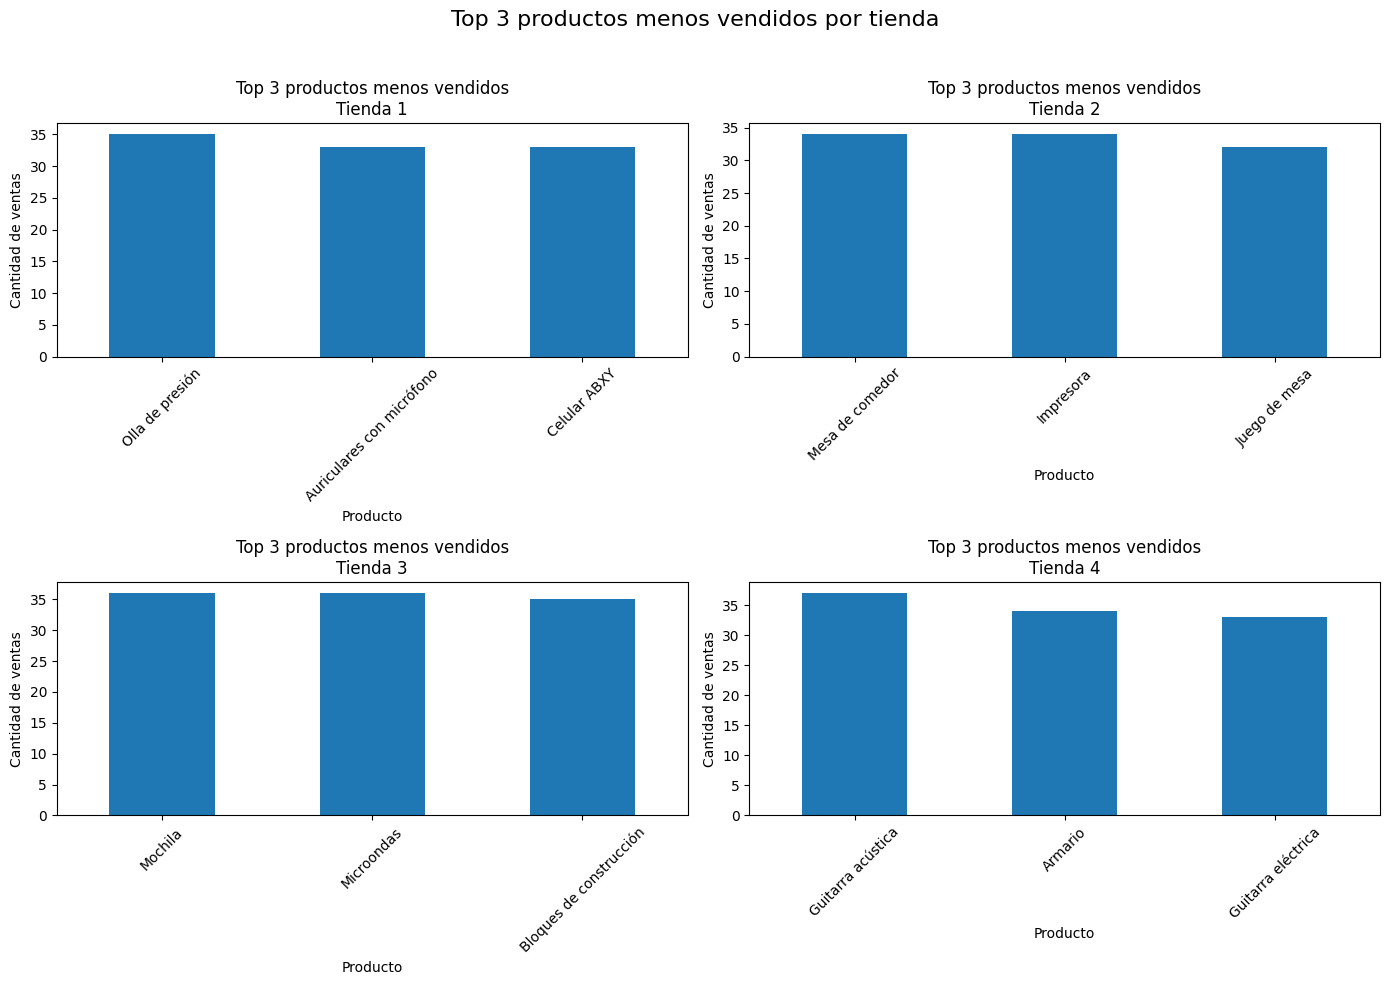

In [48]:
#Productos menos vendidos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (nombre, df) in zip(axes, tiendas_dict.items()):
    menos_vendidos = df["Producto"].value_counts().tail(3)

    menos_vendidos.plot(kind="bar", ax=ax)
    ax.set_title(f"Top 3 productos menos vendidos\n{nombre}")
    ax.set_xlabel("Producto")
    ax.set_ylabel("Cantidad de ventas")
    ax.tick_params(axis="x", rotation=45)

plt.suptitle("Top 3 productos menos vendidos por tienda", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 5. Envío promedio por tienda

In [32]:
envio_promedio = (
    pd.concat(
        [df.assign(Tienda=nombre) for nombre, df in tiendas.items()],
        ignore_index=True
    )
    .groupby("Tienda")["Costo de envío"]
    .mean()
)
df_envio_promedio = (
    envio_promedio
    .round(2)
    .reset_index(name="Costo promedio")
)
df_envio_promedio

,Tienda,Costo promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


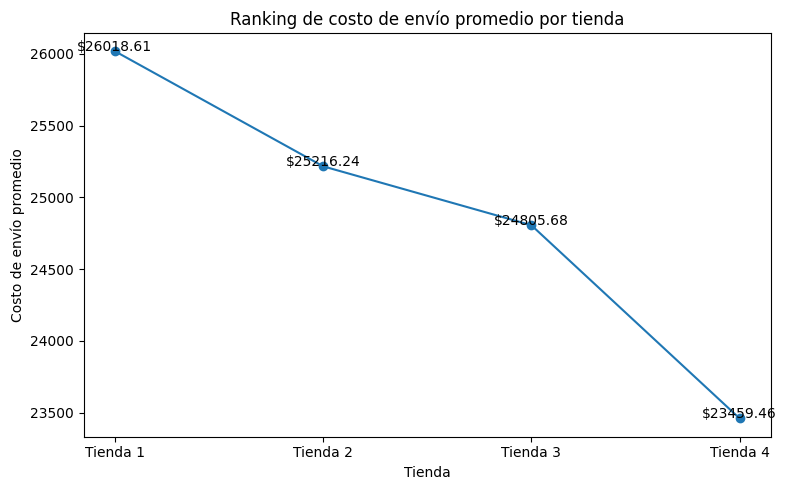

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(
    df_envio_promedio["Tienda"],
    df_envio_promedio["Costo promedio"],
    marker="o"
)

plt.title("Ranking de costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")

for i, v in enumerate(df_envio_promedio["Costo promedio"]):
    plt.text(i, v + 0.3, f"${v:.2f}", ha="center")

plt.tight_layout()
plt.show()

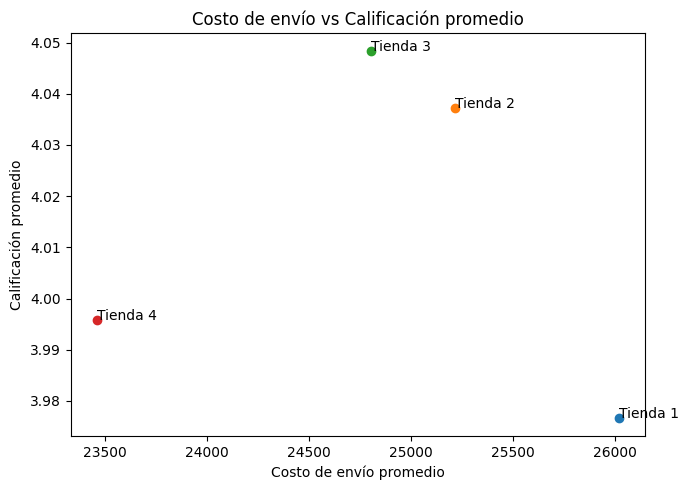

In [51]:
plt.figure(figsize=(7, 5))

for tienda in df_envio_promedio["Tienda"]:
    envio = df_envio_promedio.loc[
        df_envio_promedio["Tienda"] == tienda, "Costo promedio"
    ].values[0]

    calificacion = calificacion_promedio.loc[tienda]

    plt.scatter(envio, calificacion)
    plt.text(envio, calificacion, tienda)

plt.title("Costo de envío vs Calificación promedio")
plt.xlabel("Costo de envío promedio")
plt.ylabel("Calificación promedio")
plt.tight_layout()
plt.show()

###Relación costo-envío

In [34]:
calificacion_promedio = (
    pd.concat(
        [df.assign(Tienda=nombre) for nombre, df in tiendas.items()],
        ignore_index=True
    )
    .groupby("Tienda")["Calificación"]
    .mean()
)
print(calificacion_promedio)

Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


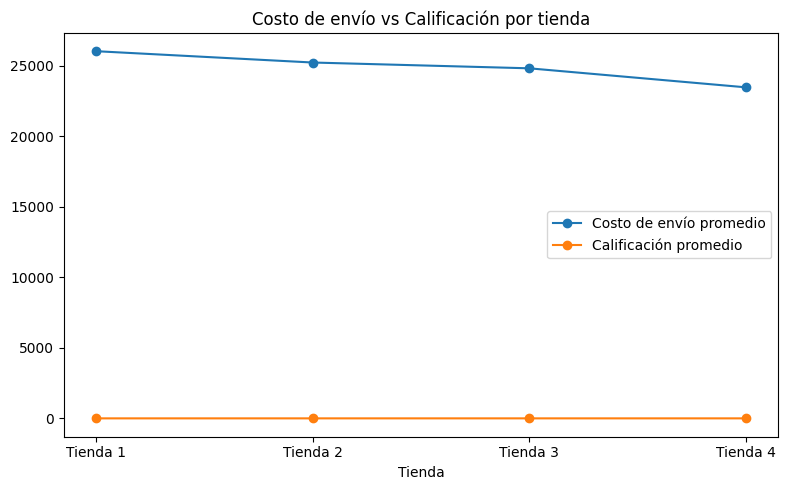

In [56]:
plt.figure(figsize=(8, 5))

plt.plot(
    envio_promedio.index,
    envio_promedio.values,
    marker="o",
    label="Costo de envío promedio"
)

plt.plot(
    calificacion_promedio.index,
    calificacion_promedio.values,
    marker="o",
    label="Calificación promedio"
)

plt.title("Costo de envío vs Calificación por tienda")
plt.xlabel("Tienda")
plt.legend()
plt.tight_layout()
plt.show()